# Football Data Exploration with pandas

This notebook explores `FootBallData.csv` using only pandas (no Neo4j).


In [1]:
from pathlib import Path

import pandas as pd

pd.set_option("display.max_columns", 40)
pd.set_option("display.width", 120)

CSV_PATH = Path("FootBallData.csv")
assert CSV_PATH.exists(), f"CSV not found at {CSV_PATH.resolve()}"

CSV_PATH


WindowsPath('FootBallData.csv')

In [2]:
# Load a small sample just to see the structure
sample = pd.read_csv(CSV_PATH, sep=';', nrows=10)
sample


,GameID,GameDate,HomeTeamName,AwayTeamName,HomeGoals,AwayGoals,Winner,CompetitionName,Country,PlayerID,PlayerName,Position,BirthDate,PlayerTeamName,MinutesPlayed,Goals,Assists,YellowCards,RedCards
0,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,164693,Jakob Ankersen,Midfield,1990-09-22,Randers FC,88,0,0,0,0
1,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,190280,Patrik Carlgren,Goalkeeper,1992-01-08,Randers FC,90,0,0,0,0
2,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,255468,Adam Andersson,Defender,1996-11-11,Randers FC,90,1,0,0,0
3,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,255469,Joel Andersson,Defender,1996-11-11,FC Midtjylland,90,0,0,0,0
4,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,274984,Marvin Egho,Attack,1994-05-09,Randers FC,17,0,0,0,0
5,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,281252,Mads Thychosen,Defender,1997-06-27,FC Midtjylland,90,0,0,1,0
6,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,316750,Tosin Kehinde,Attack,1998-06-18,Randers FC,73,0,0,1,0
7,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,320272,Frederik Lauenborg,Midfield,1997-05-18,Randers FC,90,0,0,0,0
8,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,342389,Anders Dreyer,Attack,1998-05-02,FC Midtjylland,90,0,0,0,0
9,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,348875,Hugo Andersson,Defender,1999-01-01,Randers FC,90,0,0,0,0


In [3]:
# Load more data for analysis (can be full file, but start with a subset for speed)

use_nrows = None  # set to an integer (e.g. 50000) if full file is too slow

df = pd.read_csv(CSV_PATH, sep=';', nrows=use_nrows)
df.head()


,GameID,GameDate,HomeTeamName,AwayTeamName,HomeGoals,AwayGoals,Winner,CompetitionName,Country,PlayerID,PlayerName,Position,BirthDate,PlayerTeamName,MinutesPlayed,Goals,Assists,YellowCards,RedCards
0,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,164693,Jakob Ankersen,Midfield,1990-09-22,Randers FC,88,0,0,0,0
1,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,190280,Patrik Carlgren,Goalkeeper,1992-01-08,Randers FC,90,0,0,0,0
2,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,255468,Adam Andersson,Defender,1996-11-11,Randers FC,90,1,0,0,0
3,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,255469,Joel Andersson,Defender,1996-11-11,FC Midtjylland,90,0,0,0,0
4,3828412,2022-07-15,FC Midtjylland,Randers FC,1,1,0,superligaen,Denmark,274984,Marvin Egho,Attack,1994-05-09,Randers FC,17,0,0,0,0


In [4]:
# Basic info about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98751 entries, 0 to 98750
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GameID           98751 non-null  int64 
 1   GameDate         98751 non-null  object
 2   HomeTeamName     98751 non-null  object
 3   AwayTeamName     98751 non-null  object
 4   HomeGoals        98751 non-null  int64 
 5   AwayGoals        98751 non-null  int64 
 6   Winner           98751 non-null  int64 
 7   CompetitionName  98751 non-null  object
 8   Country          98751 non-null  object
 9   PlayerID         98751 non-null  int64 
 10  PlayerName       98751 non-null  object
 11  Position         98751 non-null  object
 12  BirthDate        98751 non-null  object
 13  PlayerTeamName   98751 non-null  object
 14  MinutesPlayed    98751 non-null  int64 
 15  Goals            98751 non-null  int64 
 16  Assists          98751 non-null  int64 
 17  YellowCards      98751 non-null

In [5]:
# Quick numeric summary (compatible with older pandas)

numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].describe()


,GameID,HomeGoals,AwayGoals,Winner,PlayerID,MinutesPlayed,Goals,Assists,YellowCards,RedCards
count,9.875100e+04,98751.000000,98751.000000,98751.000000,9.875100e+04,98751.000000,98751.000000,98751.000000,98751.000000,98751.000000
mean,3.864496e+06,1.543144,1.230124,1.077225,3.350048e+05,65.351075,0.089376,0.068485,0.141011,0.004061
std,3.716654e+04,1.351799,1.173891,0.739477,2.006811e+05,30.850200,0.315525,0.271103,0.358074,0.063595
min,3.828412e+06,0.000000,0.000000,0.000000,3.333000e+03,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.840042e+06,1.000000,0.000000,1.000000,1.779640e+05,45.000000,0.000000,0.000000,0.000000,0.000000
50%,3.851304e+06,1.000000,1.000000,1.000000,3.157620e+05,83.000000,0.000000,0.000000,0.000000,0.000000
75%,3.886392e+06,2.000000,2.000000,2.000000,4.677200e+05,90.000000,0.000000,0.000000,0.000000,0.000000
max,4.055287e+06,9.000000,9.000000,2.000000,1.110406e+06,90.000000,4.000000,3.000000,2.000000,1.000000


In [6]:
# How many unique games, teams, competitions, players, countries?

summary_counts = {
    "games": df["GameID"].nunique(),
    "competitions": df["CompetitionName"].nunique(),
    "countries": df["Country"].nunique(),
    "teams_from_home": df["HomeTeamName"].nunique(),
    "teams_from_away": df["AwayTeamName"].nunique(),
    "teams_all": pd.concat([
        df["HomeTeamName"], df["AwayTeamName"], df["PlayerTeamName"]
    ]).nunique(),
    "players": df["PlayerID"].nunique(),
}
summary_counts


{'games': 3371,
 'competitions': 14,
 'countries': 14,
 'teams_from_home': 241,
 'teams_from_away': 241,
 'teams_all': 241,
 'players': 5855}

In [7]:
# Distribution of positions

df["Position"].value_counts()


Position
Defender      33026
Midfield      30214
Attack        28781
Goalkeeper     6730
Name: count, dtype: int64

In [8]:
# Top 20 goal scorers overall

player_goals = (
    df.groupby(["PlayerID", "PlayerName"], as_index=False)["Goals"]
      .sum()
      .sort_values("Goals", ascending=False)
      .head(20)
)
player_goals


,PlayerID,PlayerName,Goals
3730,418560,Erling Haaland,32
1062,139503,Enner Valencia,27
4238,489463,Kyogo Furuhashi,23
1011,132098,Harry Kane,23
3601,401923,Victor Osimhen,21
2999,342229,Kylian Mbappe,20
4510,533738,Jonathan David,20
3754,420884,Hugo Cuypers,19
1203,159894,Kevin van Veen,19
656,93720,Alexandre Lacazette,19


In [9]:
# Top 20 assist providers overall

player_assists = (
    df.groupby(["PlayerID", "PlayerName"], as_index=False)["Assists"]
      .sum()
      .sort_values("Assists", ascending=False)
      .head(20)
)
player_assists


,PlayerID,PlayerName,Assists
3398,381963,Mike Tresor,20
113,36139,Dusan Tadic,17
611,88755,Kevin De Bruyne,17
68,28003,Lionel Messi,14
3856,434675,Cody Gakpo,13
4513,534435,Joseph Paintsil,13
4232,487969,Randal Kolo Muani,12
4321,502670,Khvicha Kvaratskhelia,12
3638,406634,Matt O'Riley,11
2670,312493,Vito van Crooij,11


In [10]:
# Cards: top 20 "toughest" players by (yellow + red)

cards = (
    df.assign(TotalCards=df["YellowCards"] + df["RedCards"])
      .groupby(["PlayerID", "PlayerName"], as_index=False)["TotalCards"]
      .sum()
      .sort_values("TotalCards", ascending=False)
      .head(20)
)
cards


,PlayerID,PlayerName,TotalCards
3082,348601,Mehdi Leris,13
5695,840674,Ibrahima Bamba,13
2640,305425,Guima,13
3941,449796,Alejandro Catena,12
5331,685887,Matchoi Djalo,12
1942,236997,Tiago Silva,12
2859,332342,Callum Slattery,12
3224,361260,Ozan Kabak,12
4627,548111,Alex Baena,12
1717,208542,Stef Peeters,11


In [11]:
# Goals per team (home + away), aggregated by Home/Away goals

home_goals = (
    df.groupby("HomeTeamName", as_index=False)["HomeGoals"].sum()
      .rename(columns={"HomeTeamName": "Team", "HomeGoals": "HomeGoalsTotal"})
)

away_goals = (
    df.groupby("AwayTeamName", as_index=False)["AwayGoals"].sum()
      .rename(columns={"AwayTeamName": "Team", "AwayGoals": "AwayGoalsTotal"})
)

team_goals = (
    home_goals
    .merge(away_goals, on="Team", how="outer")
    .fillna(0)
)

team_goals["TotalGoals"] = team_goals["HomeGoalsTotal"] + team_goals["AwayGoalsTotal"]

team_goals.sort_values("TotalGoals", ascending=False).head(20)


,Team,HomeGoalsTotal,AwayGoalsTotal,TotalGoals
51,Celtic FC,1478,1513,2991
35,Bayern Munich,1379,1075,2454
20,Ajax Amsterdam,1345,1037,2382
172,Rangers FC,1272,1071,2343
157,PSV Eindhoven,1375,965,2340
139,Manchester City,1510,817,2327
160,Paris Saint-Germain,1118,1085,2203
26,Arsenal FC,1249,939,2188
119,KRC Genk,1248,924,2172
95,Feyenoord Rotterdam,956,1160,2116


In [12]:
# Example: top scorers per competition

comp_top_scorers = (
    df.groupby(["CompetitionName", "PlayerID", "PlayerName"], as_index=False)["Goals"]
      .sum()
)

# pick one competition and show its top 15 scorers
example_comp = comp_top_scorers["CompetitionName"].mode().iloc[0]
print("Example competition:", example_comp)

comp_top_scorers[
    comp_top_scorers["CompetitionName"] == example_comp
].sort_values("Goals", ascending=False).head(15)


Example competition: serie-a


,CompetitionName,PlayerID,PlayerName,Goals
4834,serie-a,401923,Victor Osimhen,21
4838,serie-a,406625,Lautaro Martinez,14
4837,serie-a,406040,Ademola Lookman,13
4773,serie-a,354814,M'Bala Nzola,13
4892,serie-a,502670,Khvicha Kvaratskhelia,12
4632,serie-a,206050,Paulo Dybala,11
4698,serie-a,283735,Mattia Zaccagni,10
4949,serie-a,626913,Boulaye Dia,10
4776,serie-a,357164,Rafael Leao,10
4534,serie-a,105521,Ciro Immobile,10


## Graph Schema Visualization (matplotlib)

The following plot shows the **logical graph schema** (node types and relationships), not the actual match data.


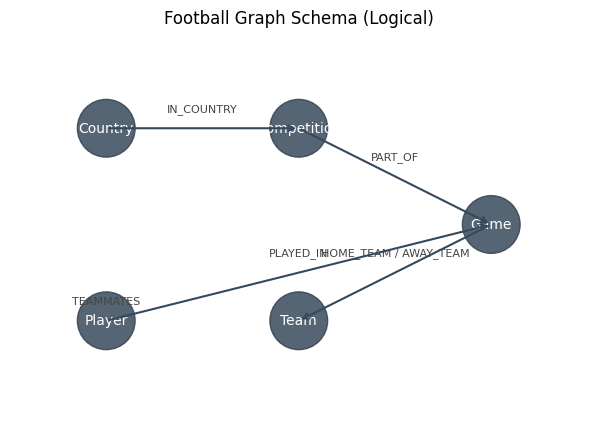

In [13]:
import matplotlib.pyplot as plt

# Simple manual layout for schema nodes
nodes = {
    "Country": (0, 2),
    "Competition": (2, 2),
    "Game": (4, 1),
    "Team": (2, 0),
    "Player": (0, 0),
}

edges = [
    ("Country", "Competition", "IN_COUNTRY"),
    ("Competition", "Game", "PART_OF"),
    ("Game", "Team", "HOME_TEAM / AWAY_TEAM"),
    ("Player", "Game", "PLAYED_IN"),
    ("Player", "Player", "TEAMMATES"),
]

fig, ax = plt.subplots(figsize=(8, 5))

# Draw nodes
for name, (x, y) in nodes.items():
    circle = plt.Circle((x, y), 0.3, color="#2c3e50", alpha=0.8)
    ax.add_patch(circle)
    ax.text(x, y, name, color="white", ha="center", va="center", fontsize=10)

# Draw edges with arrows
for src, dst, label in edges:
    x1, y1 = nodes[src]
    x2, y2 = nodes[dst]
    # small offset so arrows don't overlap node centers
    dx, dy = x2 - x1, y2 - y1
    ax.annotate(
        "",
        xy=(x2, y2),
        xytext=(x1, y1),
        arrowprops=dict(arrowstyle="->", color="#34495e", lw=1.5),
    )
    # label at midpoint
    mx, my = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(mx, my + 0.2, label, ha="center", va="center", fontsize=8, color="#444")

ax.set_aspect("equal")
ax.axis("off")
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 3)
plt.title("Football Graph Schema (Logical)")
plt.show()


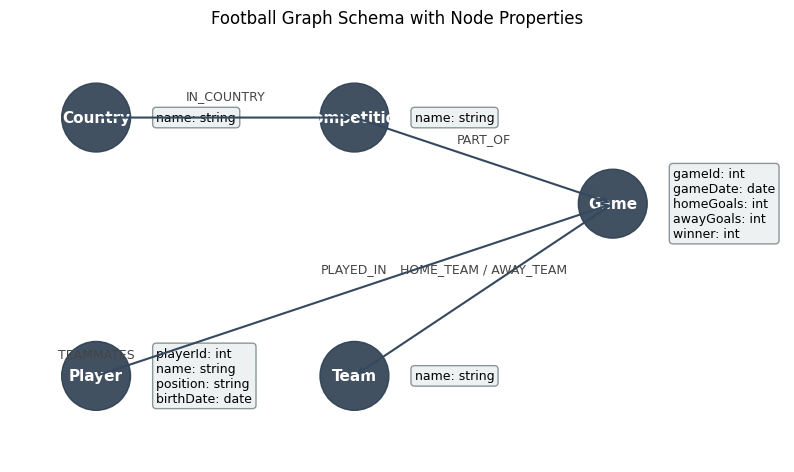

In [14]:
# Node positions
nodes = {
    "Country": (0, 3),
    "Competition": (3, 3),
    "Game": (6, 2),
    "Team": (3, 0),
    "Player": (0, 0),
}

# Relationships
edges = [
    ("Country", "Competition", "IN_COUNTRY"),
    ("Competition", "Game", "PART_OF"),
    ("Game", "Team", "HOME_TEAM / AWAY_TEAM"),
    ("Player", "Game", "PLAYED_IN"),
    ("Player", "Player", "TEAMMATES"),
]

# Properties per node label
props = {
    "Country": ["name: string"],
    "Competition": ["name: string"],
    "Game": [
        "gameId: int",
        "gameDate: date",
        "homeGoals: int",
        "awayGoals: int",
        "winner: int",
    ],
    "Team": ["name: string"],
    "Player": [
        "playerId: int",
        "name: string",
        "position: string",
        "birthDate: date",
    ],
}

fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes and property boxes
for name, (x, y) in nodes.items():
    # main circle for the label
    circle = plt.Circle((x, y), 0.4, color="#2c3e50", alpha=0.9)
    ax.add_patch(circle)
    ax.text(x, y, name, color="white", ha="center", va="center", fontsize=11, weight="bold")

    # properties text box to the right of the node
    prop_text = "\n".join(props[name])
    ax.text(
        x + 0.7, y,
        prop_text,
        ha="left", va="center",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="#ecf0f1", ec="#7f8c8d", alpha=0.9),
    )

# Draw relationship arrows + labels
for src, dst, label in edges:
    x1, y1 = nodes[src]
    x2, y2 = nodes[dst]
    ax.annotate(
        "",
        xy=(x2, y2),
        xytext=(x1, y1),
        arrowprops=dict(arrowstyle="->", color="#34495e", lw=1.5),
    )
    mx, my = (x1 + x2) / 2, (y1 + y2) / 2
    ax.text(mx, my + 0.25, label, ha="center", va="center", fontsize=9, color="#444")

ax.set_aspect("equal")
ax.axis("off")
ax.set_xlim(-1, 8)
ax.set_ylim(-1, 4)
plt.title("Football Graph Schema with Node Properties")
plt.show()